In [1]:
out_100 = """
Randomness seeded to: 3744277959
n = 100


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ex1.0 is a Catch2 v3.7.1 host application.
Run with -? for options

-------------------------------------------------------------------------------
Exercise 1.0 - Scaling
-------------------------------------------------------------------------------
/eos/user/a/alsundai/Code/CSC2025-sten/src/ex1.0_scaling.cpp:11
...............................................................................

benchmark name                       samples       iterations    est run time
                                     mean          low mean      high mean
                                     std dev       low std dev   high std dev
-------------------------------------------------------------------------------
Algorithm 1                                    100             4     3.4048 ms
                                        10.5253 us    10.3347 us     10.788 us
                                        1.13188 us    866.672 ns    1.63476 us

Algorithm 2                                    100          1704     3.0672 ms
                                         17.262 ns    17.0006 ns     17.778 ns
                                        1.81779 ns    1.08916 ns    3.07612 ns

Algorithm 3                                    100         10544     2.1088 ms
                                        2.89469 ns    2.85618 ns    2.95086 ns
                                       0.233532 ns     0.1748 ns   0.311111 ns

Algorithm 4                                    100            15      3.267 ms
                                        2.23189 us    2.18288 us    2.30104 us
                                         295.26 ns    226.187 ns    390.274 ns

Algorithm 5                                    100            22     3.0778 ms
                                        1.46841 us    1.40039 us    1.56374 us
                                        407.083 ns    323.504 ns    584.464 ns


===============================================================================
test cases: 1 | 1 passed
assertions: - none -

"""
out_1000 = """
Randomness seeded to: 3080684455
n = 1000


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ex1.0 is a Catch2 v3.7.1 host application.
Run with -? for options

-------------------------------------------------------------------------------
Exercise 1.0 - Scaling
-------------------------------------------------------------------------------
/eos/user/a/alsundai/Code/CSC2025-sten/src/ex1.0_scaling.cpp:11
...............................................................................

benchmark name                       samples       iterations    est run time
                                     mean          low mean      high mean
                                     std dev       low std dev   high std dev
-------------------------------------------------------------------------------
Algorithm 1                                    100             1    96.1274 ms
                                        990.882 us    966.616 us    1.03931 ms
                                        168.443 us    97.2315 us    266.486 us

Algorithm 2                                    100           198     3.0096 ms
                                        234.125 ns    217.568 ns    252.033 ns
                                        88.0873 ns    79.7064 ns    102.236 ns

Algorithm 3                                    100         10559     2.1118 ms
                                        2.84966 ns    2.81763 ns    2.90607 ns
                                       0.212065 ns   0.136012 ns   0.309879 ns

Algorithm 4                                    100             2       3.26 ms
                                        17.2965 us     17.131 us    17.5558 us
                                        1.04024 us     747.52 ns      1.492 us

Algorithm 5                                    100             2      3.486 ms
                                        47.5564 us    47.1464 us    48.1054 us
                                        2.39672 us    1.91278 us    2.97296 us


===============================================================================
test cases: 1 | 1 passed
assertions: - none -

"""
out_10000 = """
Randomness seeded to: 702589260
n = 10000


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ex1.0 is a Catch2 v3.7.1 host application.
Run with -? for options

-------------------------------------------------------------------------------
Exercise 1.0 - Scaling
-------------------------------------------------------------------------------
/eos/user/a/alsundai/Code/CSC2025-sten/src/ex1.0_scaling.cpp:11
...............................................................................

benchmark name                       samples       iterations    est run time
                                     mean          low mean      high mean
                                     std dev       low std dev   high std dev
-------------------------------------------------------------------------------
Algorithm 1                                    100             1     6.78362 s
                                        72.3306 ms    71.1308 ms    74.1361 ms
                                        7.41035 ms     5.4216 ms    10.3833 ms

Algorithm 2                                    100            36     3.0456 ms
                                        778.657 ns     750.48 ns    825.969 ns
                                        182.135 ns    125.408 ns    273.809 ns

Algorithm 3                                    100          9627     2.8881 ms
                                        3.05985 ns    3.01993 ns    3.12921 ns
                                       0.261545 ns   0.172922 ns   0.379524 ns

Algorithm 4                                    100             1    16.1122 ms
                                         185.05 us    182.399 us    189.289 us
                                        16.7749 us    12.1556 us    28.6202 us

Algorithm 5                                    100             1    69.6441 ms
                                        700.317 us    696.734 us    706.228 us
                                        22.9194 us    15.9191 us    39.9009 us


===============================================================================
test cases: 1 | 1 passed
assertions: - none -
"""

In [7]:
import re
from collections import defaultdict
from pprint import pprint

_UNIT_SCALE = {'ns': 1e-9, 'us': 1e-6, 'ms': 1e-3, 's': 1.0}

_RE = re.compile(
    r"Algorithm\s+(\d+).*?\n"
    r"\s+([\d.]+)\s+([a-z]+).*?\n"
    r"\s+([\d.]+)\s+([a-z]+)",
    re.IGNORECASE | re.DOTALL
)

def parse_output(n_val, raw, means, stds):
    for aid, mean, mu, std, su in _RE.findall(raw):
        k = f"Algorithm {aid}"
        means[k][n_val] = float(mean) * _UNIT_SCALE[mu.lower()]
        stds[k][n_val]  = float(std)  * _UNIT_SCALE[su.lower()]

mean = defaultdict(dict)
std  = defaultdict(dict)
for n, txt in [(100, out_100), (1000, out_1000), (10000, out_10000)]:
    parse_output(n, txt, mean, std)

pprint(dict(mean))
pprint(dict(std))

{'Algorithm 1': {100: 1.0525299999999999e-05,
                 1000: 0.000990882,
                 10000: 0.07233060000000001},
 'Algorithm 2': {100: 1.7262000000000003e-08,
                 1000: 2.3412500000000001e-07,
                 10000: 7.78657e-07},
 'Algorithm 3': {100: 2.8946900000000005e-09,
                 1000: 2.8496600000000003e-09,
                 10000: 3.0598500000000003e-09},
 'Algorithm 4': {100: 2.23189e-06, 1000: 1.72965e-05, 10000: 0.00018505},
 'Algorithm 5': {100: 1.4684099999999998e-06,
                 1000: 4.75564e-05,
                 10000: 0.000700317}}
{'Algorithm 1': {100: 1.13188e-06,
                 1000: 0.000168443,
                 10000: 0.0074103500000000004},
 'Algorithm 2': {100: 1.8177900000000002e-09,
                 1000: 8.80873e-08,
                 10000: 1.82135e-07},
 'Algorithm 3': {100: 2.33532e-10,
                 1000: 2.12065e-10,
                 10000: 2.6154500000000005e-10},
 'Algorithm 4': {100: 2.9526e-07,
            

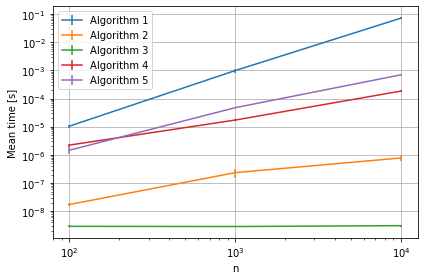

In [12]:
import matplotlib.pyplot as plt

for alg, series in mean.items():
    x, y = zip(*sorted(series.items()))
    yerr = [std[alg][xi] for xi in x]
    plt.errorbar(x, y, yerr=yerr, fmt="-", label=alg)
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.xlabel("n")
plt.ylabel("Mean time [s]")
plt.legend()
plt.tight_layout()
plt.show()

Looking at the graph I think that:


I think that:
- Algorithm 1 is Bubble sort O(n^2)
- Algorithm 2 is Count instances of value in vector O(n)
- Algorithm 3 is assign value to vector element O(1)
- Algorithm 4 is Radix sort O(n)
- Algorithm 5 is Heap sort O(n log n)
